## Importing Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Understand the Data

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Preprocessing

In [6]:
# Handle missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Converting 0 to nan bcz BP, Glucose, etc couldn't be zero
df[["Glucose", "BloodPressure",	"SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure",	"SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Outcome']))

## Exploratory Data Analysis (EDA)

<Axes: >

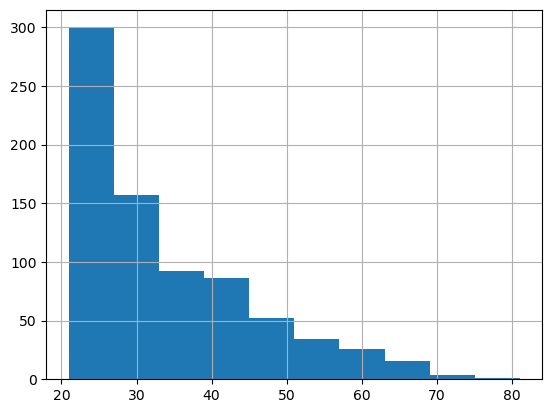

In [12]:
# show distribution of a numerical feature

# df['Glucose'].hist()
# df['Insulin'].hist()
df['Age'].hist()

Text(0.5, 1.0, 'Glucose Levels in Diabetic vs. Non-Diabetic Individuals')

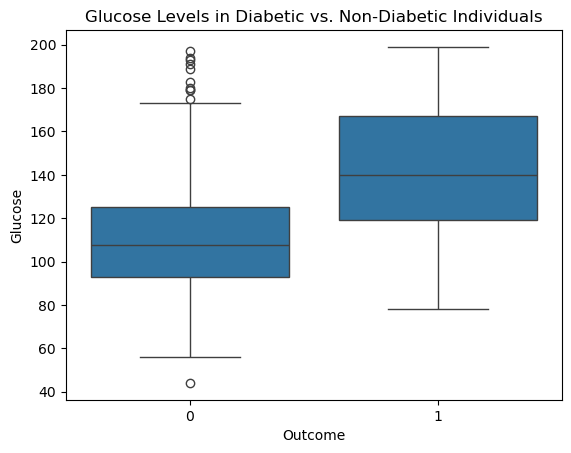

In [13]:
# show the correlation between features (like how Glucose and Outcome are related)

sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels in Diabetic vs. Non-Diabetic Individuals')

Text(0.5, 1.0, 'Correlation between Features')

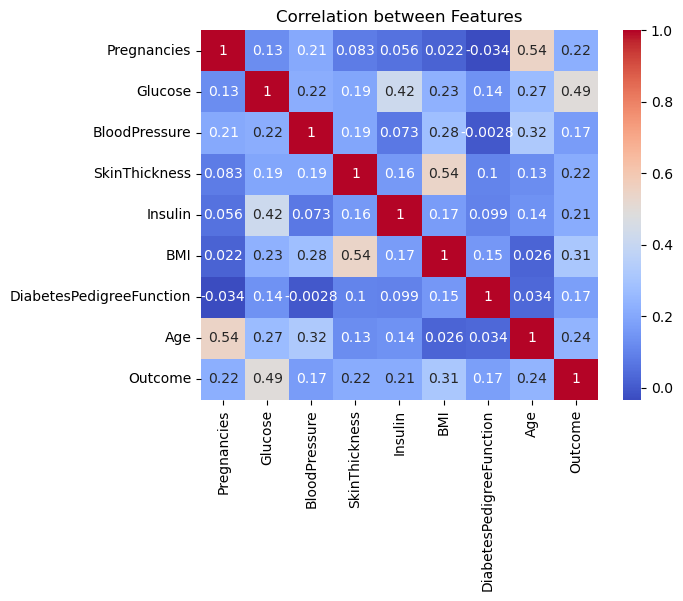

In [14]:
# Check how features are correlated with each other

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')

<Axes: xlabel='Glucose', ylabel='Insulin'>

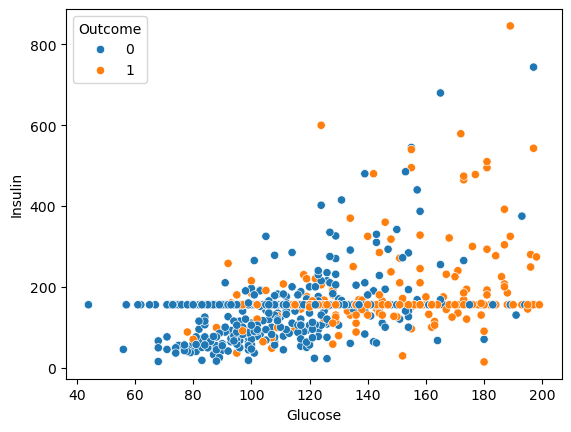

In [15]:
# relationship bw two numerical features
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)

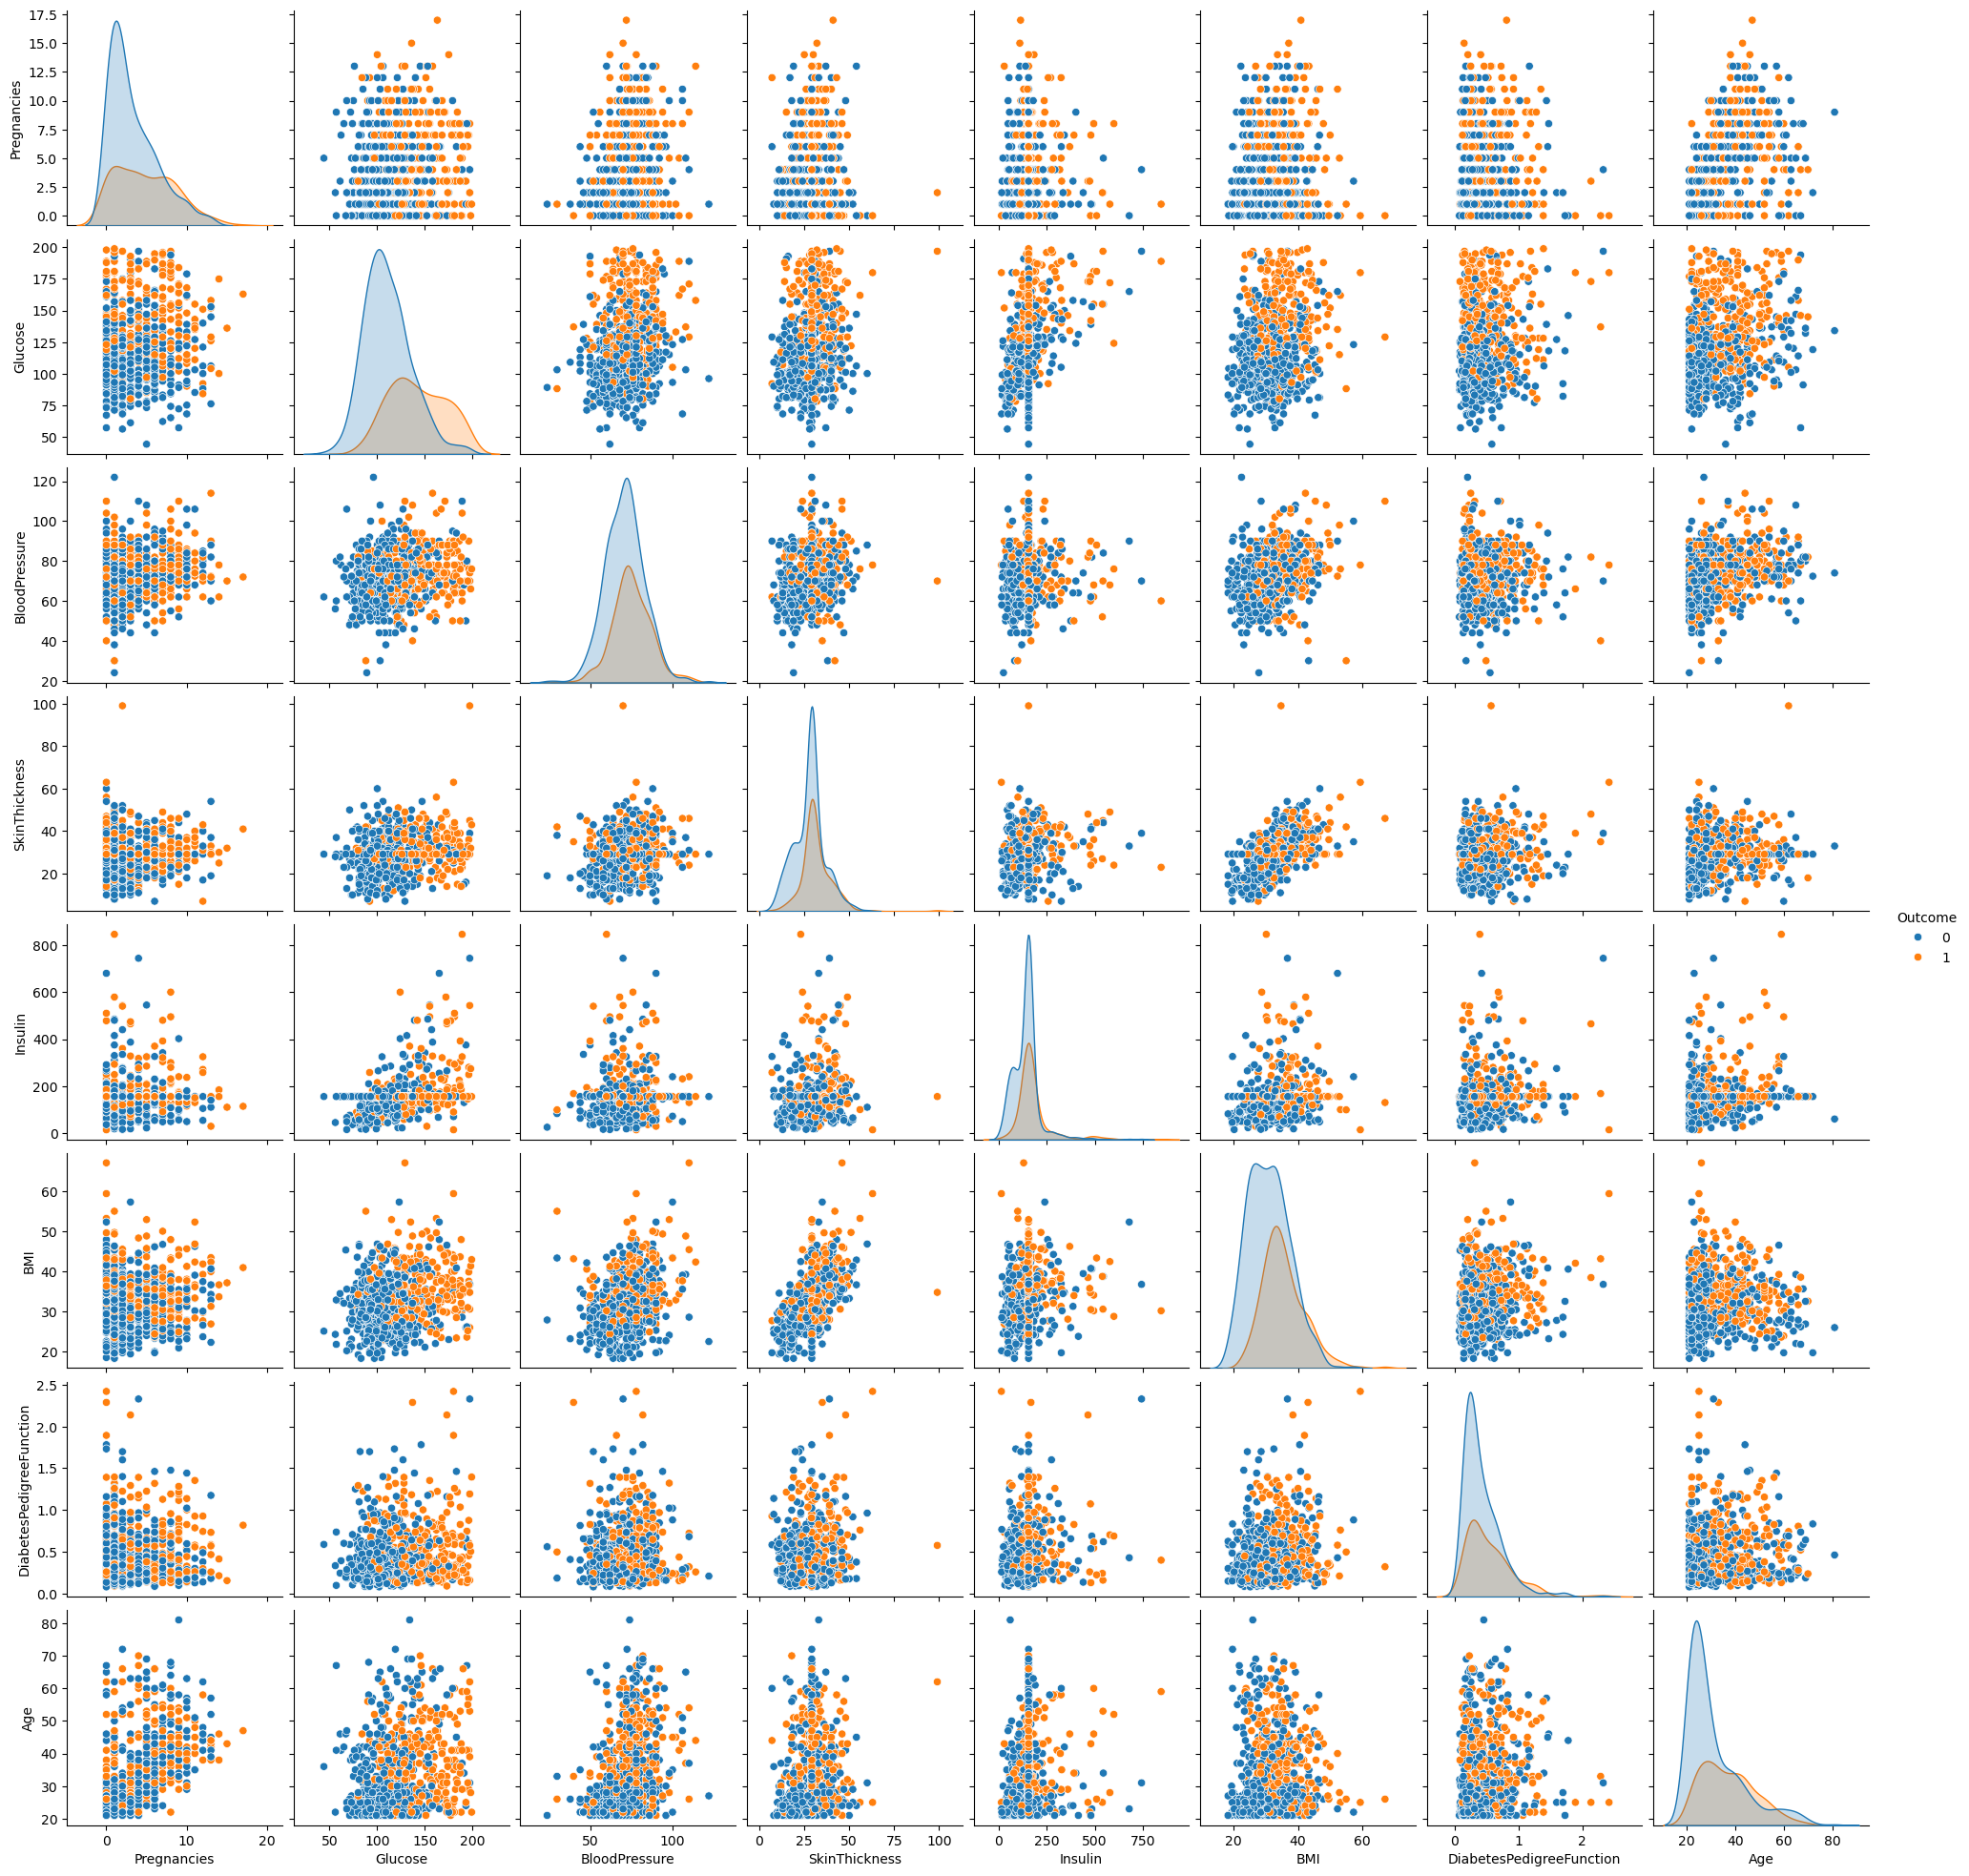

In [16]:
# show relationship bw all pairs of features
sns.pairplot(df, hue="Outcome")

## Extracting Features and Labels

In [17]:
X = df.drop(columns=["Outcome"], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [18]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Feature Engineering

In [19]:
# to know which features are more related to Label
from sklearn.feature_selection import SelectKBest, chi2

In [20]:
k = 5
chi2_selector = SelectKBest(chi2, k=k)
X_new = chi2_selector.fit_transform(X, y)

In [21]:
selected_features_indices = chi2_selector.get_support(indices=True)
print(selected_features_indices)

[0 1 4 5 7]


In [22]:
selected_features = X.columns[selected_features_indices]
print(selected_features)

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


In [23]:
selected_features_df = df[selected_features]
selected_features_df

,Pregnancies,Glucose,Insulin,BMI,Age
0,6,148.0,155.548223,33.6,50
1,1,85.0,155.548223,26.6,31
2,8,183.0,155.548223,23.3,32
3,1,89.0,94.000000,28.1,21
4,0,137.0,168.000000,43.1,33
...,...,...,...,...,...
763,10,101.0,180.000000,32.9,63
764,2,122.0,155.548223,36.8,27
765,5,121.0,112.000000,26.2,30
766,1,126.0,155.548223,30.1,47


In [24]:
selected_features_df['Outcome'] = y

C:\Users\hp\AppData\Local\Temp\ipykernel_4788\1207885921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df['Outcome'] = y


## Split the Data

In [25]:
x1 = selected_features_df.drop(["Outcome"], axis=1)
y1 = selected_features_df["Outcome"]

In [26]:
x1.shape

(768, 5)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size= 0.2, random_state= 42)

## Scikit-Learn Pipeline

In [28]:
# Use top classification models to know which is best for this particular dataset
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

In [29]:
# output of StandScaler() would be input of LogisticRegression() and so on...

pipeline_lr = Pipeline([('scaler1', StandardScaler()), 
                        ('lr_classifier', LogisticRegression())
                        ])

pipeline_knn = Pipeline([('scaler2', StandardScaler()), 
                         ('knn_classifier', KNeighborsClassifier())
                        ])

pipeline_svc = Pipeline([('scaler3', StandardScaler()), 
                         ('svc_classifier', SVC())
                        ])

pipeline_dt = Pipeline([('scaler4', StandardScaler()), 
                        ('dt_classifier', DecisionTreeClassifier())
                        ])

pipeline_rf = Pipeline([('scaler5', StandardScaler()), 
                        ('rf_classifier', RandomForestClassifier())
                        ])

pipeline_gb = Pipeline([('scaler6', StandardScaler()), 
                        ('gb_classifier', GaussianNB())
                        ])

In [30]:
pipelines = [
    pipeline_lr,
    pipeline_knn,
    pipeline_svc,
    pipeline_dt,
    pipeline_rf,
    pipeline_gb
]

In [31]:
pipe_dict = {
    0: "LR",
    1: "KNN",
    2: "SVM",
    3: "DT",
    4: "RF",
    5: "GB"
}
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVM', 3: 'DT', 4: 'RF', 5: 'GB'}

In [32]:
for i, model in enumerate(pipelines):
    # Fit each model
    model.fit(X_train, y_train)
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Print the test accuracy
    print(f"{pipe_dict[i]} Test Accuracy: {model.score(X_test, y_test)*100}")

LR Test Accuracy: 77.27272727272727
KNN Test Accuracy: 70.12987012987013
SVM Test Accuracy: 73.37662337662337
DT Test Accuracy: 70.77922077922078
RF Test Accuracy: 72.72727272727273
GB Test Accuracy: 74.67532467532467


## Model Accuracy Comparsion

In [33]:
model_names = ["Logistic Regression", "KNN", "SVM", "Decision Trees", "Random Forest", "Naive Bayes"]
accuracies = [77.27, 70.12, 73.13, 71.42, 72.72, 74.67]

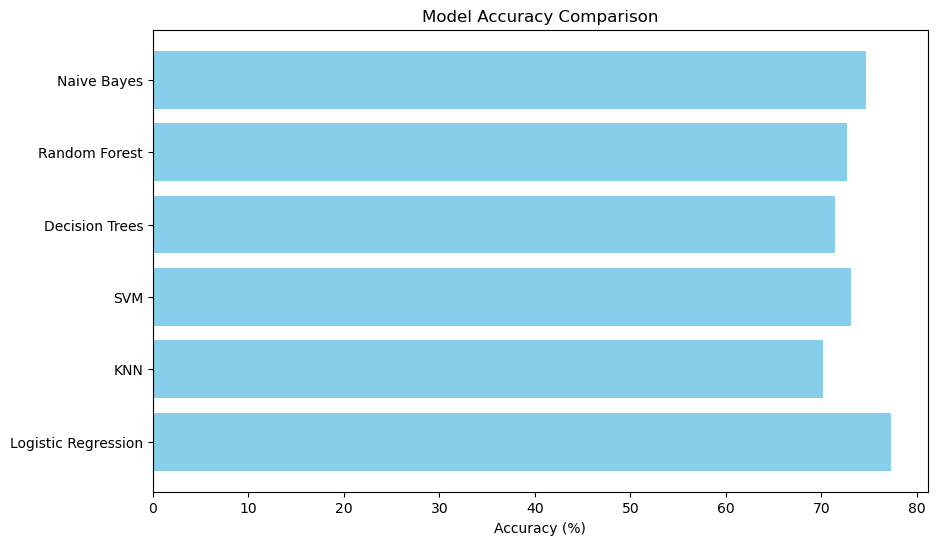

In [34]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy (%)")

# Save the plot as a png file
plt.savefig("model_accuracy.png")

plt.show()

## Using Logistic Regression due to High Accuracy

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
accuracy

77.27272727272727

## Model Results (After Testing)

A confusion matrix can easily show how well the model predicted the outcome.

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
cm = confusion_matrix(y_test, y_pred)

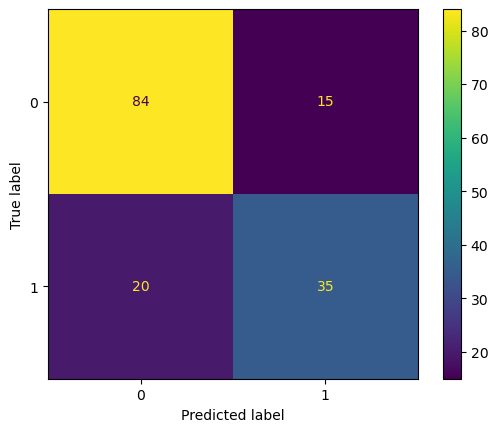

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## LR using Cross Validation

In [43]:
from sklearn.model_selection import KFold, cross_val_score

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply logistic regression
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [45]:
model = LogisticRegression(max_iter=500)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")

print("Cross-validation scores:", cv_scores*100)
print("Mean CV score:", cv_scores.mean()*100)

Cross-validation scores: [75.32467532 78.57142857 74.02597403 81.69934641 75.16339869]
Mean CV score: 76.95696460402341
